In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url_train = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [6]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

## Data preparation and data cleaning.

In [7]:
train_data = pd.read_csv(url_train, names=column_names, na_values=' ?')
test_data = pd.read_csv(url_test, names=column_names, skiprows=1, na_values=' ?')

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data.shape

(32561, 15)

In [ ]:
test_data.shape

(16281, 15)

In [ ]:
strings = list(train_data.dtypes[train_data.dtypes == 'object'].index)
for col in strings:
    train_data[col] = train_data[col].str.lower().str.strip().str.replace(' ', '_')

In [ ]:
strings = list(test_data.dtypes[test_data.dtypes == 'object'].index)
for col in strings:
    test_data[col] = test_data[col].str.lower().str.strip().str.replace(' ', '_')

## EDA.

Transform the income target column into a numeric format to enable binary classification, specifically determining whether an individual’s features indicate an income above $50k.

In [ ]:
train_data['income'] = train_data['income'].apply(lambda x: 1 if '>50k' in x.strip() else 0)

In [ ]:
test_data['income'] = test_data['income'].apply(lambda x: 1 if '>50k' in x.strip() else 0)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


There are 14 features to consider for income prediction.

The numerical features include age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week.

The categorical features are workclass, education, marital-status, occupation, relationship, race, sex, and native-country.

The categorical features workclass, occupation and native-country has null values.

Let's consider adding as unknown, as it is the correct information in terms of the information not being available in the dataset.

In [ ]:
train_data['workclass'] = train_data['workclass'].fillna('unknown')
train_data['occupation'] = train_data['occupation'].fillna('unknown')
train_data['native-country'] = train_data['native-country'].fillna('unknown')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [ ]:
train_data.income.value_counts(normalize=True)

,proportion
income,
0,0.75919
1,0.24081


In [ ]:
train_data.income.mean()

0.2408095574460244

In [ ]:
numerical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
             'hours-per-week']

In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation',
               'relationship', 'race', 'sex', 'native-country']

In [ ]:
train_data[categorical].nunique()

,0
workclass,9
education,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
native-country,42


## Feature importance. 50k High Income Rate and Income Ratio.

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,0


In [ ]:
high_50k_income_female = train_data[train_data.sex == 'female'].income.mean()
high_50k_income_female

0.10946058861758426

In [ ]:
high_50k_income_male = train_data[train_data.sex == 'male'].income.mean()
high_50k_income_male

0.3057365764111978

In [ ]:
global_50k_high_income = train_data.income.mean()
global_50k_high_income

0.2408095574460244

In [ ]:
global_50k_high_income - high_50k_income_female

0.13134896882844013

In [ ]:
global_50k_high_income - high_50k_income_male

-0.06492701896517339

In [ ]:
for c in categorical:
    print(c)
    df_group = train_data.groupby(c).income.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_50k_high_income
    df_group['risk'] = df_group['mean'] / global_50k_high_income
    display(df_group)
    print()
    print()

workclass


,mean,count,diff,risk
workclass,,,,
federal-gov,0.386458,960,0.145649,1.604830
local-gov,0.294792,2093,0.053983,1.224171
never-worked,0.000000,7,-0.240810,0.000000
private,0.218673,22696,-0.022137,0.908074
self-emp-inc,0.557348,1116,0.316538,2.314475
self-emp-not-inc,0.284927,2541,0.044118,1.183206
state-gov,0.271957,1298,0.031147,1.129344
unknown,0.104031,1836,-0.136779,0.432003
without-pay,0.000000,14,-0.240810,0.000000




education


,mean,count,diff,risk
education,,,,
10th,0.066452,933,-0.174357,0.275954
11th,0.051064,1175,-0.189746,0.212051
12th,0.076212,433,-0.164597,0.316484
1st-4th,0.035714,168,-0.205095,0.148309
5th-6th,0.048048,333,-0.192762,0.199527
7th-8th,0.061920,646,-0.178890,0.257131
9th,0.052529,514,-0.188280,0.218136
assoc-acdm,0.248360,1067,0.007550,1.031354
assoc-voc,0.261216,1382,0.020406,1.084739




marital-status


,mean,count,diff,risk
marital-status,,,,
divorced,0.104209,4443,-0.136601,0.432744
married-af-spouse,0.434783,23,0.193973,1.805504
married-civ-spouse,0.446848,14976,0.206039,1.855609
married-spouse-absent,0.081340,418,-0.159470,0.337776
never-married,0.045961,10683,-0.194849,0.190860
separated,0.064390,1025,-0.176419,0.267391
widowed,0.085599,993,-0.155210,0.355464




occupation


,mean,count,diff,risk
occupation,,,,
adm-clerical,0.134483,3770,-0.106327,0.558461
armed-forces,0.111111,9,-0.129698,0.461407
craft-repair,0.226641,4099,-0.014169,0.941161
exec-managerial,0.484014,4066,0.243204,2.009944
farming-fishing,0.115694,994,-0.125115,0.480438
handlers-cleaners,0.062774,1370,-0.178036,0.260678
machine-op-inspct,0.124875,2002,-0.115934,0.518564
other-service,0.041578,3295,-0.199231,0.172660
priv-house-serv,0.006711,149,-0.234098,0.027870




relationship


,mean,count,diff,risk
relationship,,,,
husband,0.448571,13193,0.207762,1.862763
not-in-family,0.103070,8305,-0.137739,0.428016
other-relative,0.037717,981,-0.203093,0.156624
own-child,0.013220,5068,-0.227589,0.054899
unmarried,0.063262,3446,-0.177548,0.262704
wife,0.475128,1568,0.234318,1.973043




race


,mean,count,diff,risk
race,,,,
amer-indian-eskimo,0.115756,311,-0.125054,0.480694
asian-pac-islander,0.265640,1039,0.024830,1.103113
black,0.123880,3124,-0.116930,0.514430
other,0.092251,271,-0.148559,0.383087
white,0.255860,27816,0.015050,1.062499




sex


,mean,count,diff,risk
sex,,,,
female,0.109461,10771,-0.131349,0.454553
male,0.305737,21790,0.064927,1.269620




native-country


,mean,count,diff,risk
native-country,,,,
cambodia,0.368421,19,0.127611,1.529927
canada,0.322314,121,0.081504,1.338460
china,0.266667,75,0.025857,1.107376
columbia,0.033898,59,-0.206911,0.140768
cuba,0.263158,95,0.022348,1.092805
dominican-republic,0.028571,70,-0.212238,0.118647
ecuador,0.142857,28,-0.097952,0.593237
el-salvador,0.084906,106,-0.155904,0.352584
england,0.333333,90,0.092524,1.384220


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def mutual_info_income_score(series):
    return mutual_info_score(series, train_data.income)

In [ ]:
mi = train_data[categorical].apply(mutual_info_income_score)
mi.sort_values(ascending=False)

,0
relationship,0.114623
marital-status,0.108497
education,0.064872
occupation,0.064409
sex,0.025765
workclass,0.014952
native-country,0.006027
race,0.005807


In [ ]:
train_data[numerical].corrwith(train_data.income).abs()

,0
age,0.234037
fnlwgt,0.009463
education-num,0.335154
capital-gain,0.223329
capital-loss,0.150526
hours-per-week,0.229689


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(train_data, test_size=0.20, random_state=1)

In [ ]:
df_test = test_data.copy()

In [ ]:
df_train.shape, df_val.shape, test_data.shape

((26048, 15), (6513, 15), (16281, 15))

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.income.astype('int').values
y_val = df_val.income.astype('int').values
y_test = df_test.income.astype('int').values

In [ ]:
del df_train['income']
del df_val['income']
del df_test['income']

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [ ]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [ ]:
import pickle

In [ ]:
with open('dv.pkl', 'wb') as f_dv:
    pickle.dump(dv, f_dv)

## Model Selection Process.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

In [ ]:
results = {}
scoring_metrics = {
    'accuracy': accuracy_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    scores = {}
    scores['accuracy'] = accuracy_score(y_val, y_pred)
    scores['f1'] = f1_score(y_val, y_pred)
    scores['roc_auc'] = roc_auc_score(y_val, y_proba) if y_proba is not None else None
    results[name] = scores

results_df = pd.DataFrame(results).T

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results_df

,accuracy,f1,roc_auc
Decision Tree,0.820359,0.614625,0.752438
Random Forest,0.860433,0.678002,0.901361
XGBoost,0.870567,0.702015,0.922501


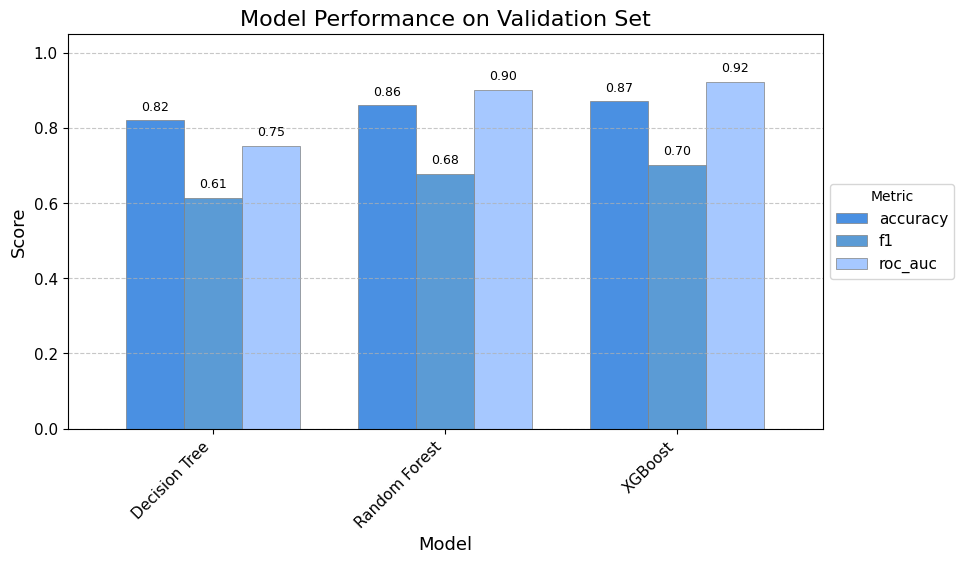

In [ ]:
colors = ['#4a90e2', '#5b9bd5', '#a6c8ff']

fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind='bar', ax=ax, color=colors, width=0.75, edgecolor='grey', linewidth=0.5)

plt.title("Model Performance on Validation Set", fontsize=16)
plt.xlabel("Model", fontsize=13)
plt.ylabel("Score", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Metric", fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(0, 1.05)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="edge", padding=5, fontsize=9, clip_on=True)

plt.tight_layout(pad=2)

plt.show()

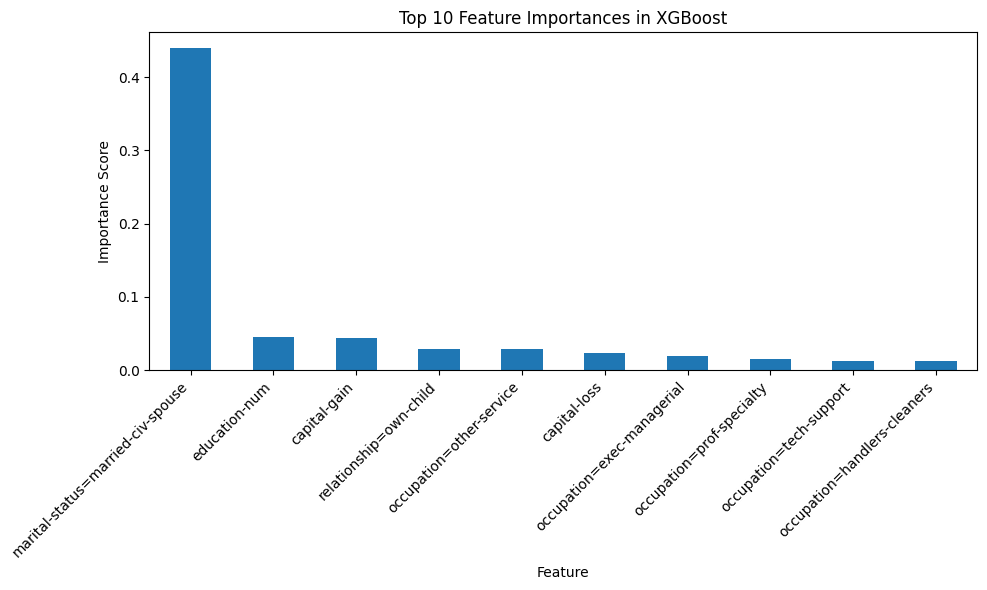

In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_importances = pd.Series(xgb_model.feature_importances_, index=dv.feature_names_)
xgb_importances = xgb_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
xgb_importances.head(10).plot(kind='bar', ax=ax)
plt.title("Top 10 Feature Importances in XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Parameter Tuning.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_tune, X_val, y_train_tune, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_tune, y_train_tune)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_xgb = random_search.best_estimator_

y_val_pred = best_xgb.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_xgb.predict_proba(X_val)[:, 1])

print("Validation Set Performance.")
print(f"Accuracy. {accuracy:.4f}.")
print(f"F1 Score. {f1:.4f}.")
print(f"ROC AUC. {roc_auc:.4f}.")

Validation Set Performance.
Accuracy. 0.8683.
F1 Score. 0.7038.
ROC AUC. 0.9252.


In [ ]:
final_xgb = XGBClassifier(**random_search.best_params_, eval_metric='logloss')
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = final_xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, final_xgb.predict_proba(X_test)[:, 1])

print("Test Set Performance.")
print(f"Accuracy. {test_accuracy:.4f}.")
print(f"F1 Score. {test_f1:.4f}.")
print(f"ROC AUC. {test_roc_auc:.4f}.")

Test Set Performance.
Accuracy. 0.8733.
F1 Score. 0.7095.
ROC AUC. 0.9272.


In [ ]:
import joblib

joblib.dump(final_xgb, 'final_xgb_model.pkl')

['final_xgb_model.pkl']

In [ ]:
print(f"Best Hyperparameters. {random_search.best_params_}.")
print(f"Final Test Accuracy. {test_accuracy:.4f}.")
print(f"Final Test F1 Score. {test_f1:.4f}.")
print(f"Final Test ROC AUC. {test_roc_auc:.4f}.")

Best Hyperparameters. {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}.
Final Test Accuracy. 0.8733.
Final Test F1 Score. 0.7095.
Final Test ROC AUC. 0.9272.


## Load the model.

In [10]:
import pickle

In [16]:
dv_input_file = 'dv.pkl'
model_input_file = 'final_xgb_model.pkl'

In [17]:
with open(dv_input_file, 'rb') as f_in:
  dv = pickle.load(f_in)

/home/user/miniconda3/envs/scraping2/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DictVectorizer from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:
with open(model_input_file, 'rb') as f_in:
  model = pickle.load(f_in)

/home/user/miniconda3/envs/scraping2/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:44:10] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [19]:
dv, model

(DictVectorizer(sparse=False),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.2, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=200,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...))